# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
farenheit = 'units='

query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'

response = requests.get(query_url).json()
response

{'coord': {'lon': 19.2345, 'lat': -34.4187},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 57.99,
  'feels_like': 56.5,
  'temp_min': 57.99,
  'temp_max': 57.99,
  'pressure': 1016,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 5.79, 'deg': 19},
 'clouds': {'all': 39},
 'dt': 1612761365,
 'sys': {'type': 3,
  'id': 2006131,
  'country': 'ZA',
  'sunrise': 1612757454,
  'sunset': 1612806221},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

In [4]:
name = []
country = []
lat = []
lng = []
temp_max = []
humid = []
clouds = []
wind = []
date = []

for city in cities:
    
    query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'
    response = requests.get(query_url).json()
    
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f"Retrieving Results for {city}. Appending stats.")
        
    except:
        print(f'{city} not found.')
        pass
        

Retrieving Results for atuona. Appending stats.
Retrieving Results for rikitea. Appending stats.
samusu not found.
Retrieving Results for mar del plata. Appending stats.
Retrieving Results for provideniya. Appending stats.
Retrieving Results for port-gentil. Appending stats.
Retrieving Results for souillac. Appending stats.
Retrieving Results for salalah. Appending stats.
Retrieving Results for chuy. Appending stats.
Retrieving Results for bredasdorp. Appending stats.
Retrieving Results for qaanaaq. Appending stats.
Retrieving Results for am timan. Appending stats.
attawapiskat not found.
Retrieving Results for castro. Appending stats.
Retrieving Results for siocon. Appending stats.
Retrieving Results for sao joao da barra. Appending stats.
Retrieving Results for lysa hora. Appending stats.
Retrieving Results for mahanoro. Appending stats.
Retrieving Results for cabo san lucas. Appending stats.
Retrieving Results for mataura. Appending stats.
Retrieving Results for natal. Appending sta

Retrieving Results for vestmannaeyjar. Appending stats.
Retrieving Results for pangody. Appending stats.
Retrieving Results for rincon. Appending stats.
Retrieving Results for nizhniy baskunchak. Appending stats.
Retrieving Results for orlovskiy. Appending stats.
Retrieving Results for sao filipe. Appending stats.
Retrieving Results for kapaa. Appending stats.
Retrieving Results for vostok. Appending stats.
Retrieving Results for miraflores. Appending stats.
Retrieving Results for ahipara. Appending stats.
inderborskiy not found.
Retrieving Results for adeje. Appending stats.
Retrieving Results for porto novo. Appending stats.
Retrieving Results for paracuru. Appending stats.
Retrieving Results for dingle. Appending stats.
Retrieving Results for saskylakh. Appending stats.
Retrieving Results for terrace. Appending stats.
Retrieving Results for sioux lookout. Appending stats.
Retrieving Results for saint-philippe. Appending stats.
Retrieving Results for ziyang. Appending stats.
Retrievi

Retrieving Results for jining. Appending stats.
Retrieving Results for kloulklubed. Appending stats.
Retrieving Results for salinopolis. Appending stats.
Retrieving Results for hamilton. Appending stats.
umm ruwabah not found.
Retrieving Results for belyy yar. Appending stats.
Retrieving Results for kabala. Appending stats.
Retrieving Results for paducah. Appending stats.
Retrieving Results for umba. Appending stats.
Retrieving Results for khartoum. Appending stats.
tumannyy not found.
Retrieving Results for stokmarknes. Appending stats.
Retrieving Results for tulsipur. Appending stats.
Retrieving Results for narsaq. Appending stats.
Retrieving Results for urengoy. Appending stats.
Retrieving Results for hofn. Appending stats.
Retrieving Results for herat. Appending stats.
Retrieving Results for tateyama. Appending stats.
Retrieving Results for benguela. Appending stats.
Retrieving Results for margate. Appending stats.
Retrieving Results for juegang. Appending stats.
Retrieving Results

Retrieving Results for usinsk. Appending stats.
Retrieving Results for merano. Appending stats.
Retrieving Results for manaia. Appending stats.
Retrieving Results for argentan. Appending stats.
Retrieving Results for abu dhabi. Appending stats.
Retrieving Results for castiglion fiorentino. Appending stats.
Retrieving Results for nichinan. Appending stats.
Retrieving Results for namibe. Appending stats.
Retrieving Results for kendari. Appending stats.
Retrieving Results for mulege. Appending stats.
Retrieving Results for marsh harbour. Appending stats.
Retrieving Results for yar-sale. Appending stats.
Retrieving Results for worthington. Appending stats.
Retrieving Results for kayes. Appending stats.
Retrieving Results for ajdabiya. Appending stats.
Retrieving Results for shirokiy. Appending stats.
Retrieving Results for shieli. Appending stats.
Retrieving Results for constantine. Appending stats.
Retrieving Results for yeppoon. Appending stats.
Retrieving Results for malakal. Appending 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame
weather_df = pd.DataFrame({
    'City': name,
    'Country': country,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humid,
    'Cloudiness': clouds,
    'Wind Speed': wind,
    'Date': date,
})
    
weather_df.to_csv("output_data/weather_data.csv")
    
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Atuona,PF,-9.8000,-139.0333,79.41,78,16,19.82,1612761365
1,Rikitea,PF,-23.1203,-134.9692,77.59,68,74,11.54,1612761221
2,Mar del Plata,AR,-38.0023,-57.5575,62.01,72,90,11.50,1612761196
3,Provideniya,RU,64.3833,-173.3000,-2.42,85,100,21.32,1612761366
4,Port-Gentil,GA,-0.7193,8.7815,81.07,80,100,8.12,1612761366
...,...,...,...,...,...,...,...,...,...
546,Pustoshka,RU,56.3355,29.3690,1.58,94,94,2.21,1612761533
547,Andenes,NO,69.3143,16.1194,30.20,86,75,3.44,1612761533
548,La Romana,DO,18.4273,-68.9728,72.03,87,28,5.46,1612761533
549,Wonthaggi,AU,-38.6044,145.5913,70.00,67,97,11.01,1612761533


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# weather_df.dtypes

weather_df = weather_df.loc[weather_df['Humidity'] < 100]

# just in case
# weather_df = weather_df['Humidity'].sort_values(ascending=False)
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Atuona,PF,-9.8000,-139.0333,79.41,78,16,19.82,1612761365
1,Rikitea,PF,-23.1203,-134.9692,77.59,68,74,11.54,1612761221
2,Mar del Plata,AR,-38.0023,-57.5575,62.01,72,90,11.50,1612761196
3,Provideniya,RU,64.3833,-173.3000,-2.42,85,100,21.32,1612761366
4,Port-Gentil,GA,-0.7193,8.7815,81.07,80,100,8.12,1612761366
...,...,...,...,...,...,...,...,...,...
546,Pustoshka,RU,56.3355,29.3690,1.58,94,94,2.21,1612761533
547,Andenes,NO,69.3143,16.1194,30.20,86,75,3.44,1612761533
548,La Romana,DO,18.4273,-68.9728,72.03,87,28,5.46,1612761533
549,Wonthaggi,AU,-38.6044,145.5913,70.00,67,97,11.01,1612761533


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

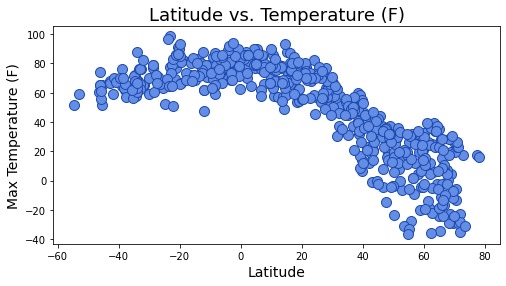

In [8]:
lat_x = weather_df['Lat']
temp_y = weather_df['Max Temp']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Temperature (F)', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.show()

## Latitude vs. Humidity Plot

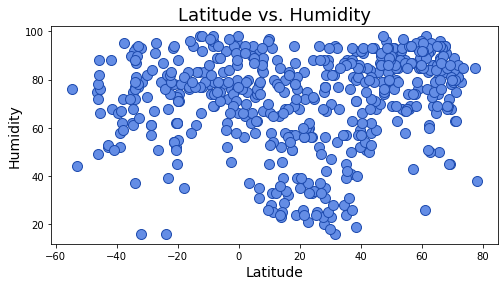

In [9]:
lat_x = weather_df['Lat']
humid_y = weather_df['Humidity']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Humidity', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.show()

## Latitude vs. Cloudiness Plot

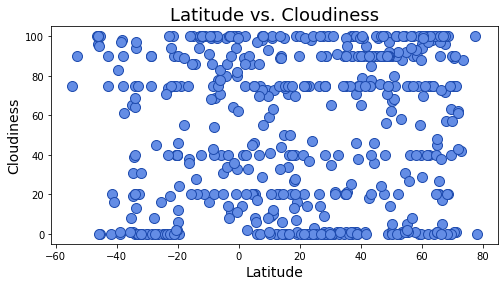

In [10]:
lat_x = weather_df['Lat']
cloud_y = weather_df['Cloudiness']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Cloudiness', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.show()

## Latitude vs. Wind Speed Plot

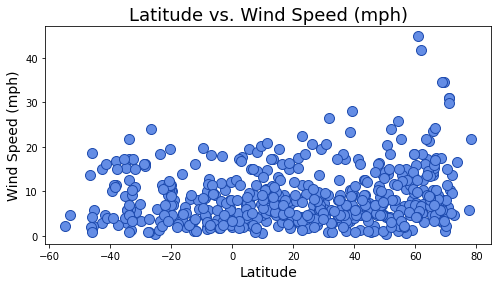

In [11]:
lat_x = weather_df['Lat']
wind_y = weather_df['Wind Speed']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Wind Speed (mph)', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.show()

## Linear Regression

In [29]:
northern_df = weather_df.loc[weather_df['Lat'] > 0]
# northern_df

southern_df = weather_df.loc[weather_df['Lat'] < 0]
# southern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

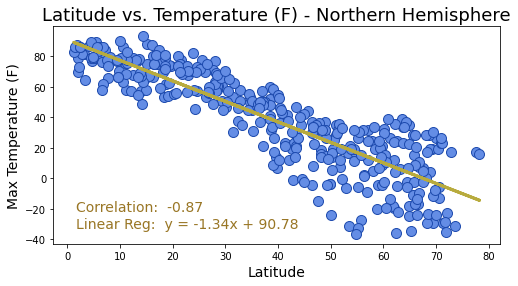

In [30]:
n_lat_x = northern_df['Lat']
n_temp_y = northern_df['Max Temp']

n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = linregress(n_lat_x, n_temp_y)
n_temp_regression = n_temp_slope * n_lat_x + n_temp_int
n_temp_regression_txt = f'y = {str(round(n_temp_slope,2))}x + {str(round(n_temp_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_temp_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Temperature (F) - Northern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.annotate(f'Correlation:  {round(n_temp_r, 2)}', xy=(0.05, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_temp_regression_txt}', xy=(0.05, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

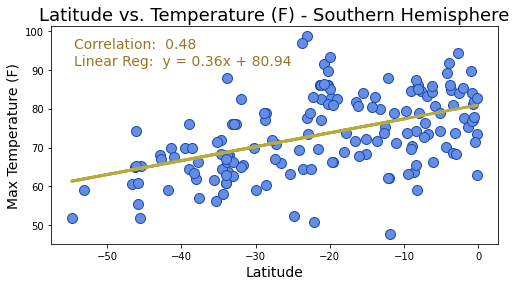

In [31]:
s_lat_x = southern_df['Lat']
s_temp_y = southern_df['Max Temp']

s_temp_slope, s_temp_int, s_temp_r, s_temp_p, s_temp_std_err = linregress(s_lat_x, s_temp_y)
s_temp_regression = s_temp_slope * s_lat_x + s_temp_int
s_temp_regression_txt = f'y = {str(round(s_temp_slope,2))}x + {str(round(s_temp_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_temp_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Temperature (F) - Southern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.annotate(f'Correlation:  {round(s_temp_r, 2)}', xy=(0.05, 0.9), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_temp_regression_txt}', xy=(0.05, 0.82), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

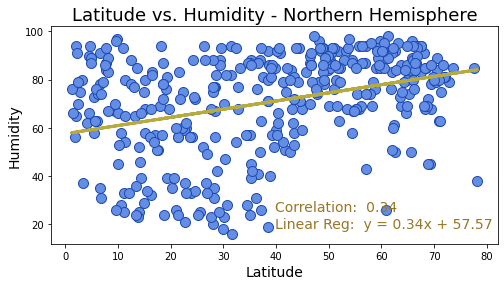

In [32]:
n_lat_x = northern_df['Lat']
n_humid_y = northern_df['Humidity']

n_humid_slope, n_humid_int, n_humid_r, n_humid_p, n_humid_std_err = linregress(n_lat_x, n_humid_y)
n_humid_regression = n_humid_slope * n_lat_x + n_humid_int
n_humid_regression_txt = f'y = {str(round(n_humid_slope,2))}x + {str(round(n_humid_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_humid_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Humidity - Northern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.annotate(f'Correlation:  {round(n_humid_r, 2)}', xy=(0.50, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_humid_regression_txt}', xy=(0.50, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

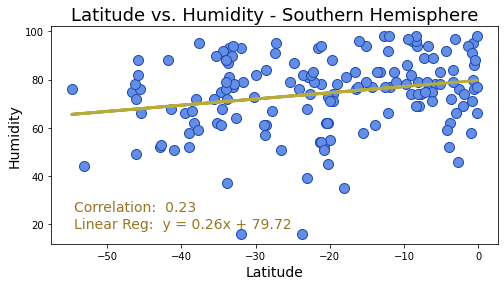

In [33]:
s_lat_x = southern_df['Lat']
s_humid_y = southern_df['Humidity']

s_humid_slope, s_humid_int, s_humid_r, s_humid_p, s_humid_std_err = linregress(s_lat_x, s_humid_y)
s_humid_regression = s_humid_slope * s_lat_x + s_humid_int
s_humid_regression_txt = f'y = {str(round(s_humid_slope,2))}x + {str(round(s_humid_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_humid_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Humidity - Southern Hemisphere', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.annotate(f'Correlation:  {round(s_humid_r, 2)}', xy=(0.05, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_humid_regression_txt}', xy=(0.05, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression